# End-to-end Machine Learning project

# Author: Fernando Perna, TODO: add names

**Original Dataset Source: 2022 World Cup Stats. https://www.kaggle.com/datasets/greysonmb/2022-world-cup-stats.**

# 2022 World Cup Dataset Description

**Attributes for 2022worldcup.csv dataset:**

1. squad - country (unique values)

2. pi - player size (numeric: from 18 to 26)

3. age - average age (numeric: from 24.9 to 29.7)

4. poss - possession (numeric: from 31.3 to 75.8)

5. mp - matches played (numeric: from 3 to 7)

6. starts - starts (numeric: from 33 to 77)

7. min - minutes played (numeric: from 270 to 690)

8. 90s - 90's played (numeric: from 3 to 7.7)

9. gls - goals scored (numeric: from 1 to 16)

10. ast - assists (numeric: from 0 to 12)

11. g + a - goals and assists (numeric: from 1 to 28)

12. g-pk - non-penalty goals (numeric: from 0 to 14)

13. pk - penalty kicks made (numeric: from 0 to 4)

14. pkatt - penalty kicks attempted (numeric: from 0 to 5)

15. crdy - yellow cards (numeric: from 1 to 17)

16. crdr - red c ards (numeric: from 0 to 1)

17. xg - expected goals (numeric: from 1.4 to 15.1)

18. npxg - non-penalty expected goals (numeric: from 1.4 to 12.2)

19. xag - expected assisted goals (numeric: from 0.6 to 10.3)

20. npxg+xag - non-penalty expected goals plus assisted goals (numeric: from 2 to 22.5)

21. prgc - progressive carries (numeric: from 21 to 173)

22. prgp - progressive passes (numeric: from 51 to 348)

23. gls90 - goals scored per 90 minutes (numeric: from 0.33 to 2.6)

24. ast90 - assists per 90 minutes (numeric: from 0 to 2.2)

25. g+a90 - goals and assists per 90 minutes (numeric: from 0.33 to 4.8)

26. g-pk90 - non-penalty goals per 90 minutes (numeric: from 0 to 2.4)

27. g+a-pk90 - non-penalty goals + assists per 90 minutes (numeric: from 0 to 4.6)

28. xg90 - expected goals per 90 minutes (numeric: from 0.47 to 3.35)

29. xag90 - expected assisted goals per 90 minutes (numeric: from 0.2 to 2.5)

30. xg+xag90 - expected goals plus assisted gals per 90 minutes (numeric: from 0.68 to 5.85)

31. npxg90 - non-penalty expected goals per 90 minutes (numeric: from 0.47 to 3.09)

32. npxg+xag90 - non-penalty expected goals plus assisted goals per 90 minutes (numeric: from 0.68 to 5.59)

# 1- Look at the big picture

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform student advisors of students at risk, and contact them to let them know of available support.

In [ ]:
# Import libraries
# you can install missing library using pip install numpy

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series.
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [ ]:
# Download the dataset
# If there is no separator, you can use df = pd.read_csv(url)
# If the dataset is on your local machine use df = pd.read_csv("datasets/student/student-mat-modified-RA.csv")
# If reading from UCI directly, some datasets are available thorugh the ucimlrepo (https://github.com/uci-ml-repo/ucimlrepo)

url = "/content/2022worldcup.csv"
stats = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
stats_backup = stats

# 3. Explore and visualize the data to gain insights.


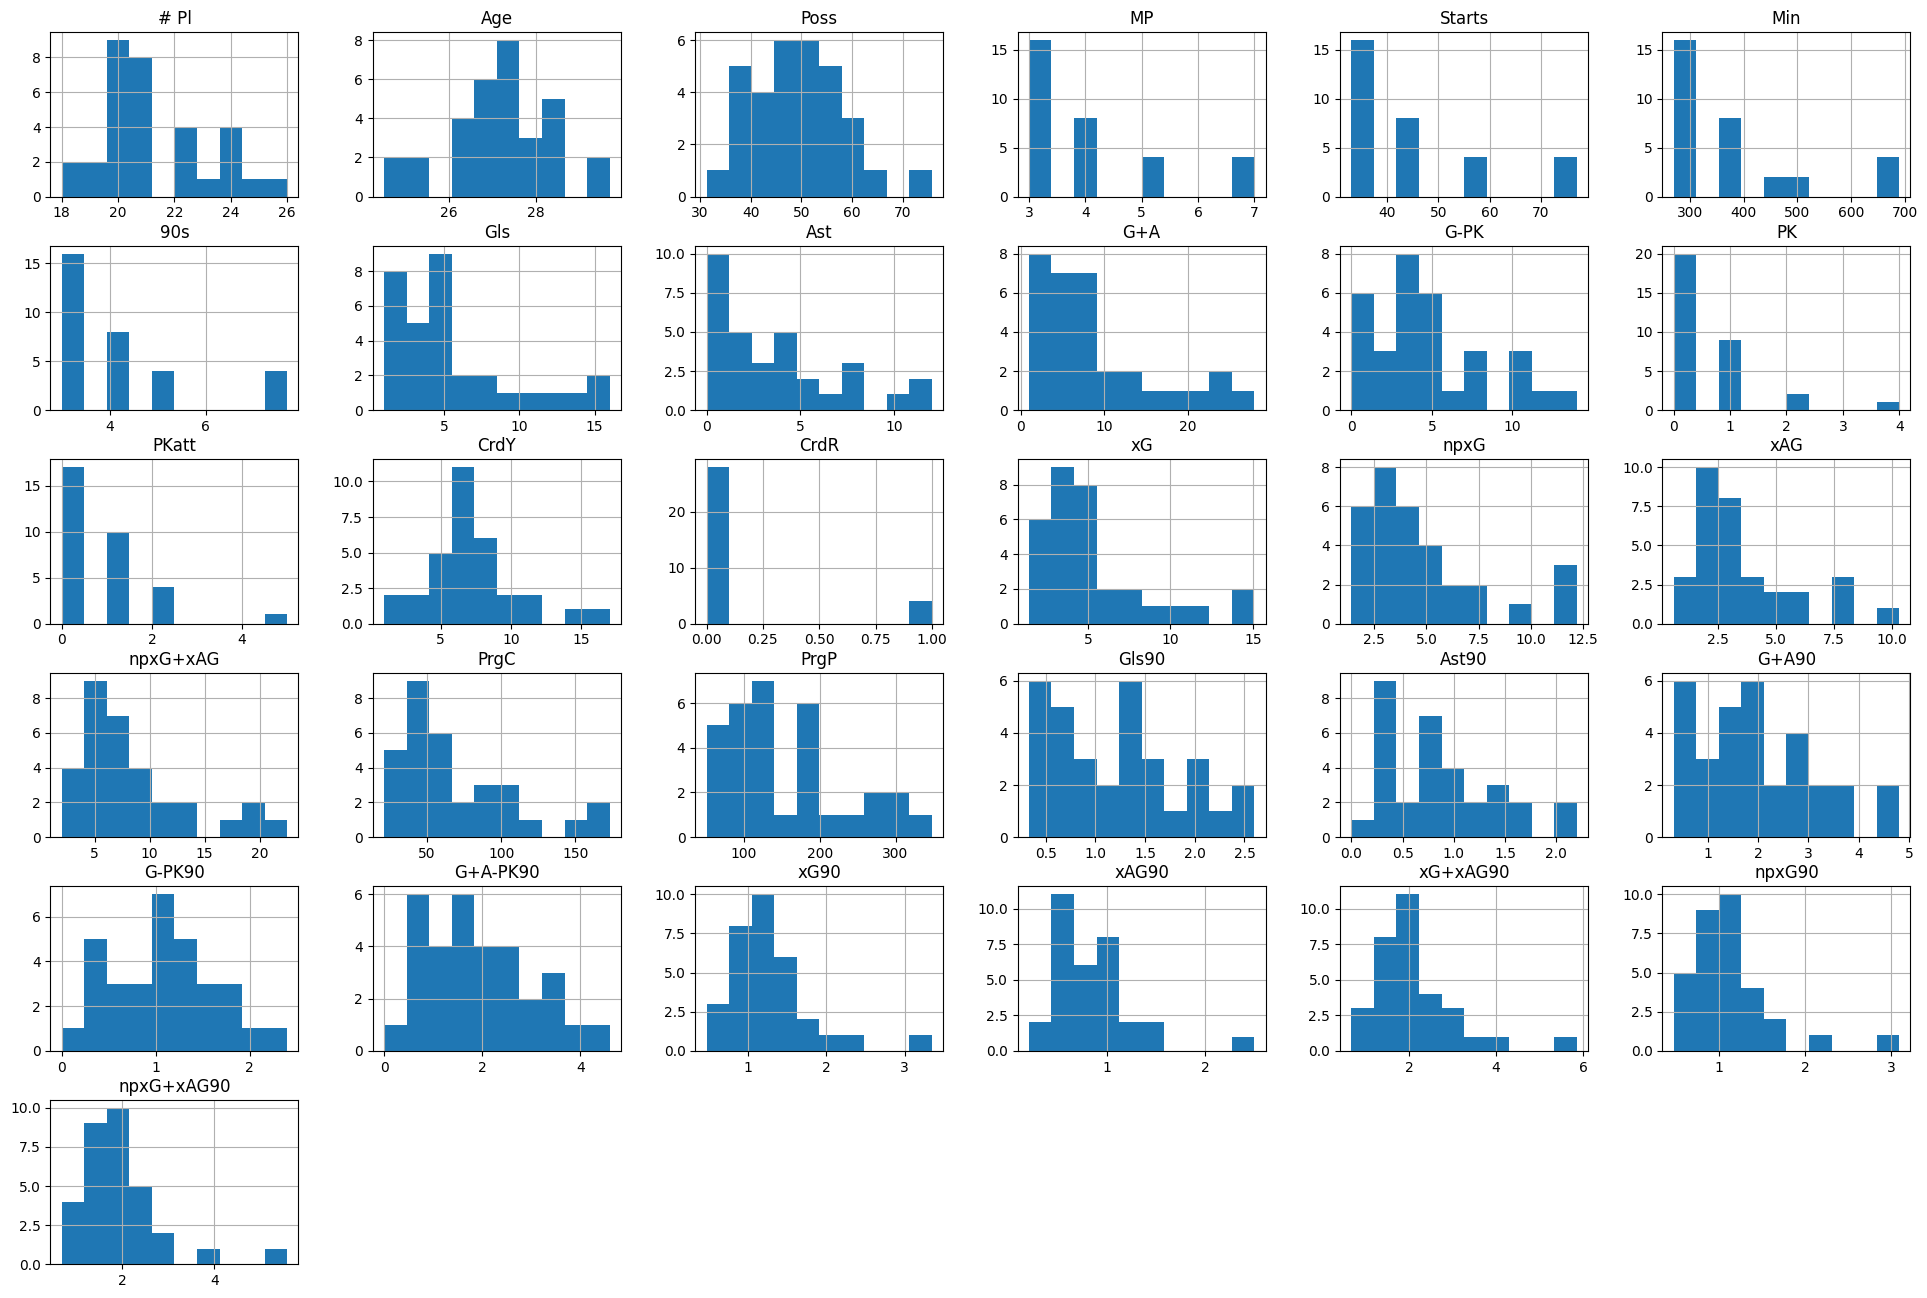

In [ ]:
stats.hist(figsize=(24, 16))
plt.show()

## Look for correlations between the features

### 3.2 Check for correlation between attributes using sns.pairplot.

In [ ]:
#Check for correlation between attributes using sns.pairplot. TAKES 10 MINUTES TO RUN UNCOMMENT IF YOU WANT TO RUN IT
#sns.pairplot(stats)

### 3.3 Look for correlations using pearson correlation coefficient

In [ ]:
corr_matrix = stats.corr(numeric_only=True)
corr_matrix

,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,G+A,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
# Pl,1.000000,0.126714,-0.027711,0.578180,0.578180,0.575434,0.572721,0.518385,0.491619,0.513808,...,0.371514,0.381531,0.385139,0.388279,0.394109,0.212593,0.173634,0.202226,0.226432,0.216777
Age,0.126714,1.000000,-0.366198,-0.114133,-0.114133,-0.100897,-0.098521,-0.248491,-0.226458,-0.242208,...,-0.324854,-0.280045,-0.311808,-0.310884,-0.301751,-0.118934,-0.032241,-0.082299,-0.054370,-0.040761
Poss,-0.027711,-0.366198,1.000000,0.183742,0.183742,0.193908,0.193980,0.418743,0.437578,0.433019,...,0.416399,0.455048,0.446664,0.380004,0.426796,0.511401,0.525845,0.527381,0.497286,0.513411
MP,0.578180,-0.114133,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.781439,...,0.428579,0.439981,0.445239,0.400340,0.429852,0.182266,0.145247,0.170994,0.144695,0.151929
Starts,0.578180,-0.114133,0.183742,1.000000,1.000000,0.997056,0.996997,0.778636,0.760216,0.781439,...,0.428579,0.439981,0.445239,0.400340,0.429852,0.182266,0.145247,0.170994,0.144695,0.151929
Min,0.575434,-0.100897,0.193908,0.997056,0.997056,1.000000,0.999941,0.774649,0.750804,0.774985,...,0.421466,0.426925,0.435267,0.393325,0.419871,0.183674,0.144871,0.171662,0.148436,0.153739
90s,0.572721,-0.098521,0.193980,0.996997,0.996997,0.999941,1.000000,0.773743,0.749814,0.774030,...,0.419912,0.425446,0.433713,0.391167,0.418005,0.183130,0.143768,0.170856,0.147144,0.152516
Gls,0.518385,-0.248491,0.418743,0.778636,0.778636,0.774649,0.773743,1.000000,0.943872,0.989174,...,0.867540,0.798809,0.859231,0.820432,0.829805,0.467290,0.361125,0.430737,0.388196,0.384934
Ast,0.491619,-0.226458,0.437578,0.760216,0.760216,0.750804,0.749814,0.943872,1.000000,0.982126,...,0.816811,0.891654,0.874823,0.807312,0.868949,0.437544,0.410909,0.435216,0.403324,0.416897
G+A,0.513808,-0.242208,0.433019,0.781439,0.781439,0.774985,0.774030,0.989174,0.982126,1.000000,...,0.857244,0.851329,0.878282,0.826180,0.858904,0.460668,0.388338,0.438805,0.400395,0.404566


#### Let's look at correlations with regard to our target

In [ ]:
corr_matrix["Poss"].sort_values(ascending=False)

### 3.4 Plot G1 vs. G3 using sns.lineplot, and create a scatterplot for G2 and G3.

In [ ]:
#plot G1 vs. G3

g = sns.lineplot(x="PrgP", y="Poss", data=stats, errorbar=None)

# Create a scatterplot of G2 and G3

X = stats["PrgP"]
y = stats["Poss"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("PrgP")
plt.ylabel("Poss")

# 4. Prepare the data for Machine Learning Algorithms

In [ ]:
# Dropping expected coloumns: xG, npxG, xAG, npxG+xAG, xG90, xAG90, xG+xAG90,
# npxG90, npxG+xAG90

stats.drop(labels=['xG', 'npxG', 'xAG', 'npxG+xAG', 'xG90', 'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'], axis=1, inplace=True)

In [ ]:
stats.columns

### 4.3. Create a pipeline that will

1. Scale the numerical columns using StandardScaler. Do not scale the target

2. Encode the categorical columns using OneHotEncoder


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
#create the cat and num columns
num_cols = stats.select_dtypes(include='number').columns.to_list()
cat_cols = stats.select_dtypes(exclude='number').columns.to_list()


#exclude the target from numerical columns
num_cols.remove("Poss")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#### Display your pipeline

In [ ]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['# Pl', 'Age', 'MP', 'Starts', 'Min', '90s',
                                  'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
                                  'CrdY', 'CrdR', 'PrgC', 'PrgP', 'Gls90',
                                  'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Squad'])])

In [ ]:
# Apply the preprocessing pipeline on the dataset
stats_prepared = preprocessing.fit_transform(stats)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
stats_prepared = pd.DataFrame(data=stats_prepared, columns=feature_names)

stats_prepared

,num__# Pl,num__Age,num__MP,num__Starts,num__Min,num__90s,num__Gls,num__Ast,num__G+A,num__G-PK,...,cat__Squad_Saudi Arabia,cat__Squad_Senegal,cat__Squad_Serbia,cat__Squad_Spain,cat__Squad_Switzerland,cat__Squad_Tunisia,cat__Squad_United States,cat__Squad_Uruguay,cat__Squad_Wales,remainder__Poss
0,1.432078,0.261526,2.267787,2.267787,2.399424,2.42712,2.382924,1.331035,1.949225,1.768976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.4
1,-0.650945,0.520356,0.000000,0.000000,-0.070159,-0.06742,-0.568827,-0.246488,-0.433648,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.8
2,-0.650945,2.159610,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,2.473589,0.347802,0.755929,0.755929,0.827871,0.80904,0.661069,0.700026,0.687704,0.631142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.2
4,0.390567,0.002696,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,0.069017,-0.153310,-0.222233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.7
5,-1.171700,0.088973,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
6,0.390567,2.159610,-0.755929,-0.755929,-0.743681,-0.74162,-0.568827,-0.877497,-0.713986,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.3
7,-0.130189,0.951738,2.267787,2.267787,2.399424,2.42712,0.661069,1.331035,0.968042,0.915601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.3
8,-0.650945,-0.514963,-0.755929,-0.755929,-0.743681,-0.74162,-1.060786,-0.877497,-0.994324,-1.075609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
9,-1.692456,-1.981665,-0.755929,-0.755929,-0.743681,-0.74162,-0.322848,-0.561992,-0.433648,-0.506692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split

X = stats_prepared.drop(["remainder__Poss"], axis=1)
y = stats_prepared["remainder__Poss"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25, 53) (25,) (7, 53) (7,)


### 5.2 Train a Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [ ]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

19.862177112601355